# Purification Analysis

Dengan menggunakan data yang disediakan dari Zyfra, akan melihat pemurnian logam seperti `emas, perak, dan timah`. Dalam melakukan hal ini, tahapan-tahapan proses yang berbeda akan dilihat untuk konsentrasi bahan dan ukuran partikel. Dan juga akan membuat sejumlah model, memilih yang terbaik, untuk memprediksi hasil pemurnian dan pemrosesan.

## Import Data

### Import library

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

### Import data

In [222]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

## Overview of Data

### Training data

In [223]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [224]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### Test data

In [225]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [226]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


### Complate data

In [227]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [228]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


###  Verify rougher.output.recovery calculations

In [229]:
# Membuat fungsi untuk menghitung pemulihan
def recovery(df, C, F, T):
    rec = 100 * ((df[C] * (df[F] - df[T])) / (df[F] * (df[C] - df[T])))
    return rec

# Menghitung pemulihan untuk baris yang tidak memiliki NaN di rougher.output.recovery.
vals_pred = recovery(data_train.dropna(subset=['rougher.output.recovery']), 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')
vals_act = data_train['rougher.output.recovery'].dropna().to_list()

print(f"Mean Absolute Error: {mean_absolute_error(vals_act, vals_pred)}")

Mean Absolute Error: 9.303415616264301e-15


Untuk MEA antara perhitungan yang diberikan untuk `rougher.output.recovery` dan nilai perhitungan nya mendekati nol yang menunjukkan bahwa data yang diberikan benar. Perbedaan menit antara kedua rangkaian penghitungan dapat dikaitkan dengan derajat pembulatan yang berbeda yang secara alami akan menghasilkan hasil yang hampir sama dengan perbedaan menit.

### Identify differences in data between training and test sets

In [230]:
# Membuat daftar nama kolom data set
test_columns = data_test.columns

# Menghapus kolom training set yang terjadi di data set
train_only_columns = data_train.drop(columns=test_columns)

# Mendapatkan info yang tersisa
train_only_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                                16794 non-null  float64


Semua jenis parameter keluaran dan penghitungan yang ada di set pelatihan tidak disertakan dalam test set. Semua nilai ini juga merupakan tipe data float.

Mereka mewakili data yang akan berguna ketika membuat model, meskipun mereka tidak penting ketika memverifikasi/mengujinya karena beberapa mungkin merupakan target potensial dan bukan fitur.

### Data preprocessing 

#### Training data set

In [231]:
# MengUbah kolom tanggal menjadi tipe data datetime
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')

In [232]:
data_train.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [233]:
data_train = data_train.dropna().reset_index(drop=True)
data_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

Melakukan penghapusan semua nilai yang hilang daripada mencoba mengisi setiap nilai kolom yang hilang dengan nilai terhitung yang dapat mengubah data sedemikian rupa sehingga menimbulkan masalah dengan analisis atau pembuatan model.

In [234]:
data_train.duplicated().sum()

0

Sudah tidak terdapat baris yang duplicate

#### Test data set

In [235]:
# Mengubah kolom tanggal menjadi tipe data datetime
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')

In [236]:
data_test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [237]:
data_test = data_test.dropna().reset_index(drop=True)
data_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Sama seperti pada kumpulan training data, menghapus semua baris dengan nilai yang hilang dari data pengujian untuk mencegah masalah dengan analisis dan verifikasi/pengujian model di masa mendatang.

In [238]:
data_test.duplicated().sum()

0

Sudah tidak terdapat baris yang duplicate

#### Complate data set

In [239]:
# Mengubah kolom tanggal menjadi tipe data datetime
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')

In [240]:
data_full.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [241]:
data_full = data_full.dropna().reset_index(drop=True)
data_full.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

Sama seperti dalam kumpulan training data dan test data, kami menghapus semua nilai yang hilang karena alasan akurasi analisis yang disebutkan di atas. Hal ini juga konsisten karena dua kumpulan data sebelumnya diambil dari kumpulan lengkap, semua baris yang sama yang berisi nilai yang hilang akan dihapus.

In [242]:
data_full.duplicated().sum()

0

Tidak terdapat baris yang duplicate

## Data Analysis

###  Metal concentraion output by stage

In [243]:
# Creating dataset of just the concentrations of ag, au, and pb - there is no secondary_cleaner.output for ag, pb, or au
data_concentration = data_full[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au']]

In [244]:
data_concentration = data_concentration[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au']].mean()
display(data_concentration)

final.output.concentrate_ag               5.190976
final.output.concentrate_pb               9.997593
final.output.concentrate_au              44.307437
primary_cleaner.output.concentrate_ag     8.674853
primary_cleaner.output.concentrate_pb     9.884018
primary_cleaner.output.concentrate_au    32.065559
rougher.output.concentrate_ag            12.084945
rougher.output.concentrate_pb             7.553095
rougher.output.concentrate_au            20.052152
dtype: float64

In [245]:
# Membuat kerangka data ringkas menggunakan informasi di atas untuk grafik

concentrations = [['ag', 12.084945, 8.674853, 5.190976],
                  ['pb', 7.553095, 9.884018, 9.997593],
                  ['au', 20.052152, 32.065559, 44.307437]
                 ]

conc_columns = ['metal', 'rougher', 'primary_cleaner', 'final']

data_concentration = pd.DataFrame(data=concentrations, columns=conc_columns)

data_concentration

,metal,rougher,primary_cleaner,final
0,ag,12.084945,8.674853,5.190976
1,pb,7.553095,9.884018,9.997593
2,au,20.052152,32.065559,44.307437


In [246]:
temp = data_full[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au']].mean().reset_index()
temp.columns = ['name', 'concetration']
temp['stage'] = temp.name.str.split('.').map(lambda x: x[0])
temp['metal'] = temp.name.str.split('.').map(lambda x: x[2]).str.split('_').map(lambda x: x[1])
temp = pd.pivot_table(temp, values='concetration', index='metal', columns='stage')
temp[['rougher', 'primary_cleaner', 'final']]

stage,rougher,primary_cleaner,final
metal,,,
ag,12.084945,8.674853,5.190976
au,20.052152,32.065559,44.307437
pb,7.553095,9.884018,9.997593


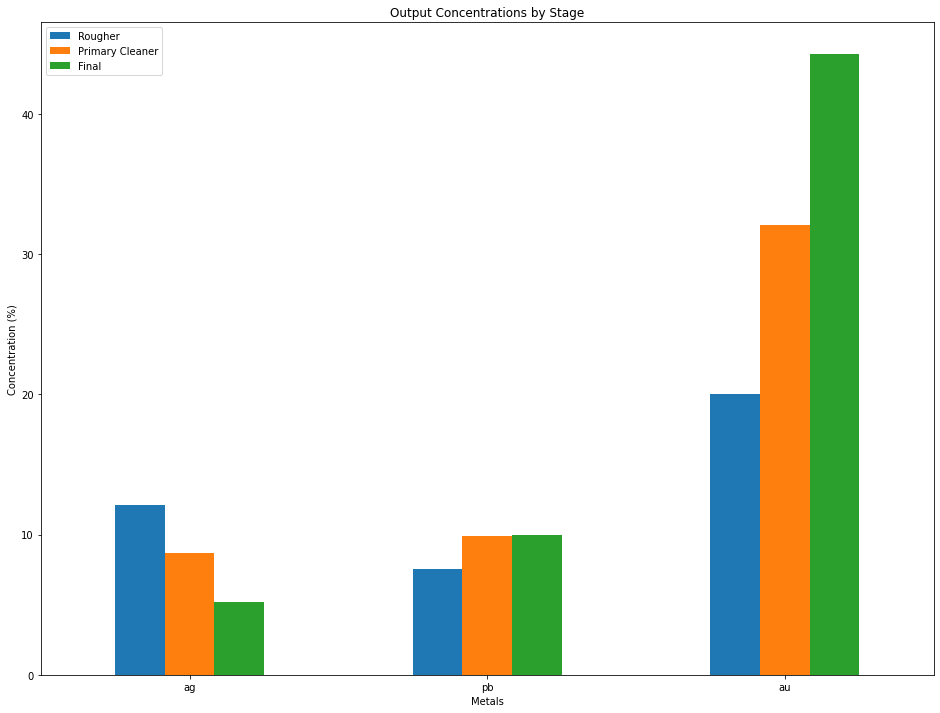

In [247]:
data_concentration.plot(kind='bar', 
                      x='metal', 
                      y=['rougher', 'primary_cleaner', 'final'], 
                      title='Output Concentrations by Stage', 
                      xlabel='Metals', 
                      ylabel='Concentration (%)',
                      figsize=[16,12]
                     )
plt.legend(['Rougher', 'Primary Cleaner', 'Final'])
plt.xticks(rotation = 0)
plt.show()

Berdasarkan konsentrasi rata-rata/rata-rata, konsentrasi ketiga logam yang berbeda menunjukkan pola yang sepenuhnya unik bergantung pada tahap pemurnian.

`Perak (ag)` menunjukkan penurunan konsentrasi semakin banyak tahap pemurnian yang dilakukan.

`Timbal (pb)` mendapat manfaat dari tahap pemurnian Pembersih Primer, namun tidak menunjukkan peningkatan pemurnian yang nyata dari tahap pemurnian akhir.

`Emas (au)` menunjukkan manfaat yang besar dari setiap tahap proses pemurnian, dengan perkiraan peningkatan lebih dari 10 unit per tahap yang dilalui.

Tergantung pada metode ekstraksi dan isolasi, akan lebih bermanfaat jika mengekstraksi perak setelah tahap Kasar, mengekstraksi timbal setelah tahap Pembersih Utama untuk menghemat waktu dan sumber daya, dan memungkinkan emas menyelesaikan semua tahapan yang ditentukan. pemurnian untuk mendapatkan hasil tertinggi.

### Feed Particle Size Distributions

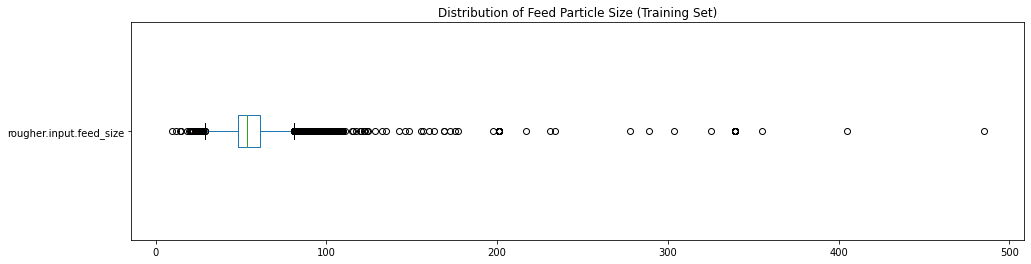

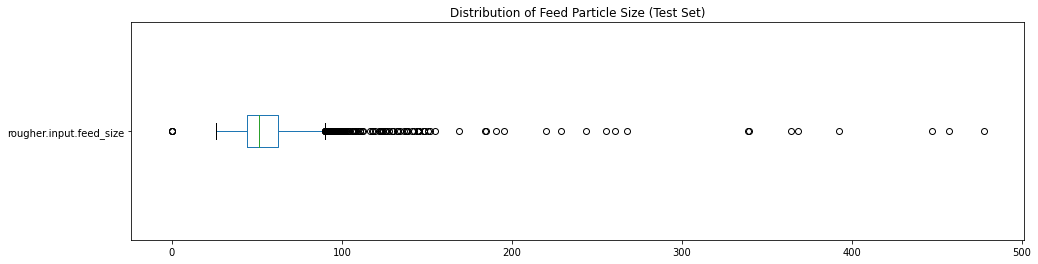

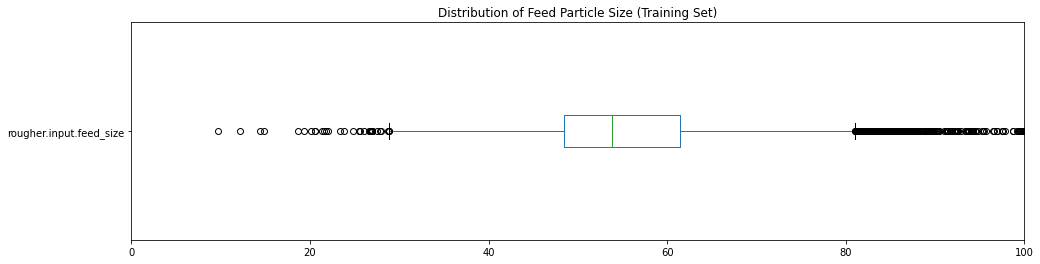

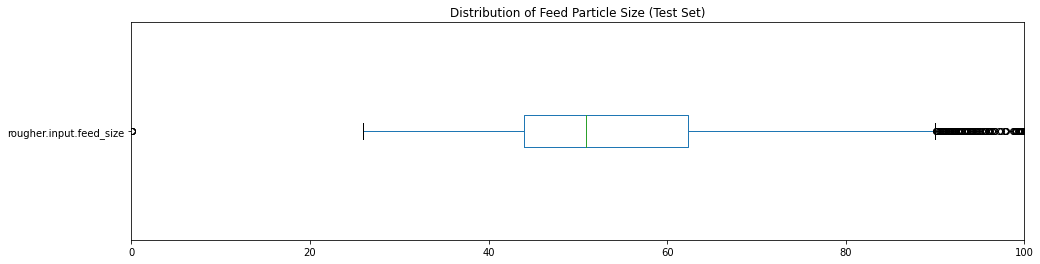

In [248]:
data_train['rougher.input.feed_size'].plot(kind='box',
                                           figsize=[16,4],
                                           xlabel='Particle Size',
                                           title='Distribution of Feed Particle Size (Training Set)',
                                           vert=False
                                          )


plt.show()

data_test['rougher.input.feed_size'].plot(kind='box',
                                        figsize=[16,4],
                                        xlabel='Particle Size',
                                        title='Distribution of Feed Particle Size (Test Set)',
                                        vert=False
                                       )
plt.show()

data_train['rougher.input.feed_size'].plot(kind='box',
                                           figsize=[16,4],
                                           xlabel='Particle Size',
                                           title='Distribution of Feed Particle Size (Training Set)',
                                           vert=False,
                                           xlim=[0,100]
                                          )

plt.show()

data_test['rougher.input.feed_size'].plot(kind='box',
                                        figsize=[16,4],
                                        xlabel='Particle Size',
                                        title='Distribution of Feed Particle Size (Test Set)',
                                        vert=False,
                                        xlim=[0,100]
                                       )
plt.show()

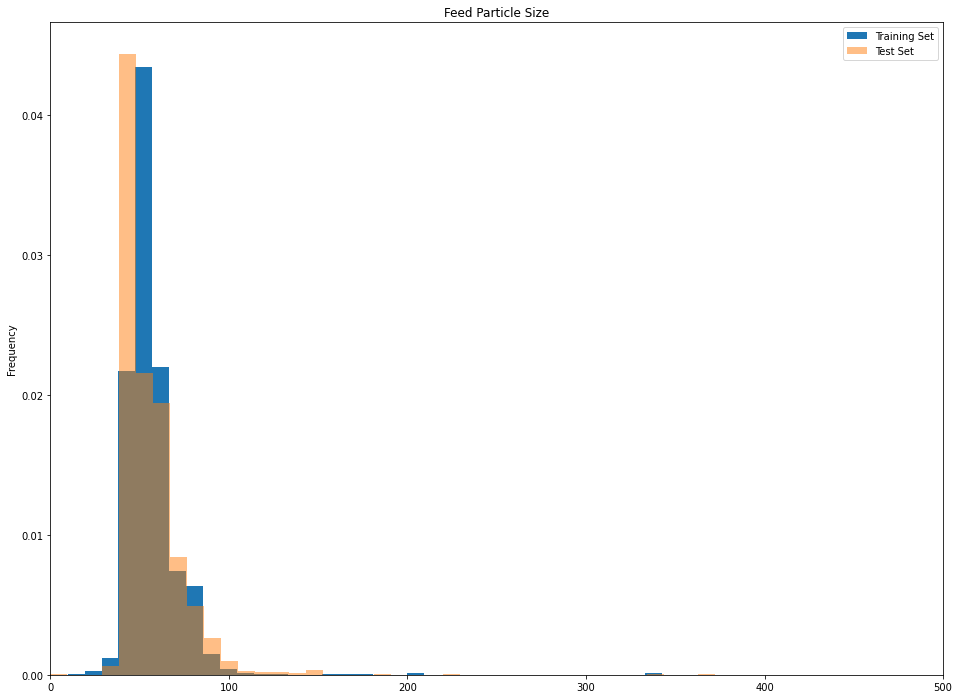

In [249]:
data_train['rougher.input.feed_size'].plot(kind='hist', 
                                         bins=50, 
                                         title='Feed Particle Size',
                                         figsize=[16,12],
                                         xlim=[0,500],
                                         density=True
                                        )
data_test['rougher.input.feed_size'].plot(kind='hist', bins=50, alpha=0.5, density=True)

plt.legend(['Training Set', 'Test Set'])
plt.show()

In [250]:
display(data_train['rougher.input.feed_size'].describe())
display(data_test['rougher.input.feed_size'].describe())

count    11017.000000
mean        57.215128
std         18.913146
min          9.659576
25%         48.397242
50%         53.843359
75%         61.461770
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    5383.000000
mean       56.338644
std        21.836788
min         0.046369
25%        43.913766
50%        50.924232
75%        62.364984
max       477.445473
Name: rougher.input.feed_size, dtype: float64

Plot kotak kumpulan data training dan test menunjukkan kumpulan pelatihan memiliki rata-rata yang sedikit lebih tinggi bersama dengan kuartil pertama dan ketiga - hal ini hanya didukung oleh hasil numerik dari data tersebut. Namun titik +/- 3 standar deviasi untuk masing-masing kumpulan data relatif berdekatan satu sama lain. Rata-ratanya kira-kira 2 lebih rendah untuk training set dan deviasi standarnya kira-kira 0,5 satu sama lain, semakin tinggi test set nya.

Terdapat sejumlah besar outlier pada level tertinggi untuk kedua kumpulan data, namun terdapat lebih banyak outlier pada level terendah pada kumpulan data training.

Meskipun distribusinya sedikit berbeda, hal ini tidak cukup mempengaruhi evaluasi model.

#### Substance Concentrations by Stage

Mempertimbangkan konsentrasi total semua zat pada tahapan yang berbeda: `pakan mentah, konsentrat kasar, dan konsentrat akhir`. Apakah terlihat adanya nilai abnormal dalam distribusi total? Jika ya, apakah layak untuk menghapus nilai tersebut dari kedua sampel? Jelaskan temuan dan hilangkan anomali.

In [251]:
concentrate = pd.DataFrame()

concentrate['date'] = data_full['date'] # sebuah konstanta antar kerangka data jika baris perlu dihapus
concentrate['rougher_input'] = data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_pb'] + data_full['rougher.input.feed_au']
concentrate['rougher_output'] = data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_pb'] + data_full['rougher.output.concentrate_au']
concentrate['final_output'] = data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb'] + data_full['final.output.concentrate_au']

In [252]:
concentrate['date'].duplicated().sum() 

0

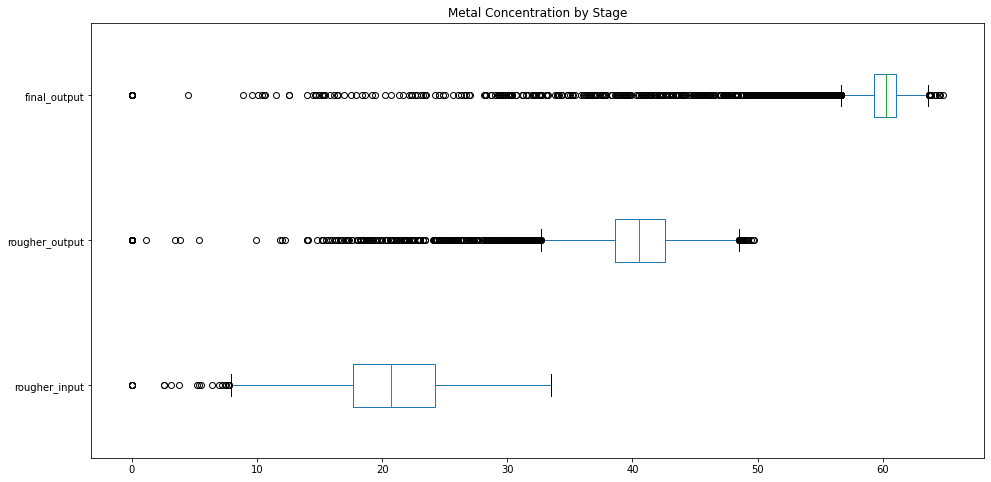

In [253]:
concentrate.plot(kind='box',
                 figsize=[16,8],
                 xlabel='Concentration (%)',
                 title='Metal Concentration by Stage',
                 vert=False
                )


plt.show()

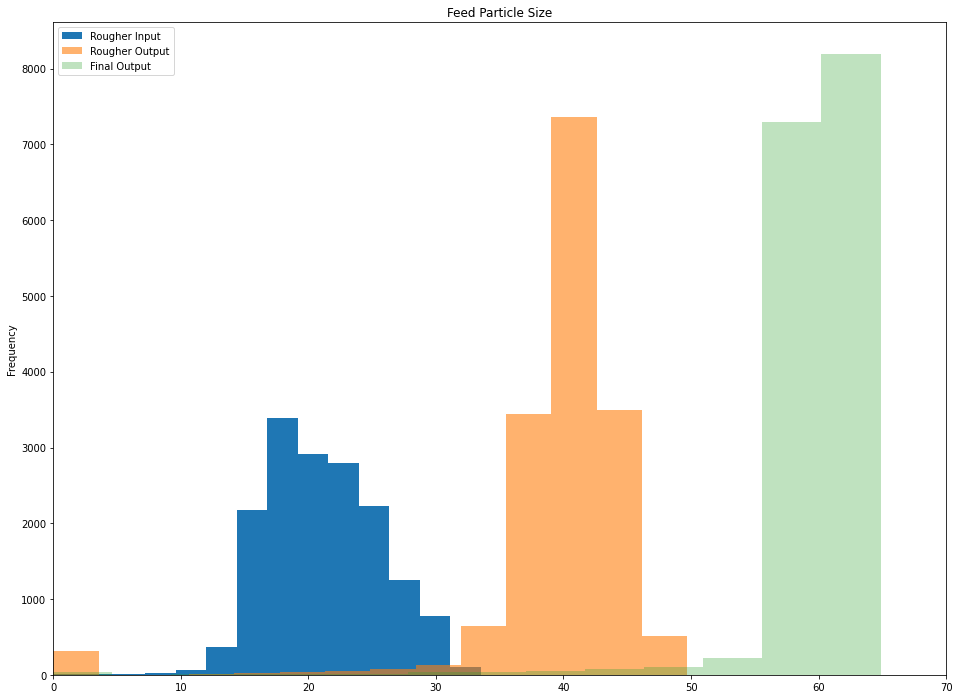

In [254]:
concentrate['rougher_input'].plot(kind='hist', 
                 bins=14, 
                 title='Feed Particle Size',
                 figsize=[16,12],
                 xlim=[0,70]
                        )
concentrate['rougher_output'].plot(kind='hist', bins=14, alpha=0.6)
concentrate['final_output'].plot(kind='hist', bins=14, alpha=0.3)

plt.legend(['Rougher Input', 'Rougher Output', 'Final Output'])
plt.show()

Distribusi konsentrasi berdasarkan tahap menunjukkan bahwa konsentrasi meningkat dengan setiap langkah pemurnian, yang masuk akal, jika tidak, pemrosesan tidak akan ada gunanya. Ada juga outlier yang konsisten pada distribusi di tingkat rendah yang mencakup rentang yang lebih luas dibandingkan dengan distribusi di tingkat tinggi. Namun, terdapat pengelompokan yang konsisten mendekati 0, yang mewakili konsentrasi minimal karena satuannya adalah persentase bahan yang diukur. Hal ini dapat mempengaruhi pemodelan, jadi kami akan mengidentifikasi baris-baris tersebut dengan konsentrasi total kurang dari 0,5, dan menghapusnya dari data.

In [255]:
# daftar tanggal di mana salah satu dari tiga kolom < 0.5
concentrate.head()

,date,rougher_input,rougher_output,final_output
0,2016-01-15 00:00:00,14.871440,38.395653,58.137072
1,2016-01-15 01:00:00,14.905729,38.945647,58.699942
2,2016-01-15 02:00:00,14.638299,38.649756,58.927421
3,2016-01-15 03:00:00,14.199305,38.411473,58.714815
4,2016-01-15 04:00:00,13.511497,38.867359,59.065251


In [256]:
remove = concentrate.query("rougher_input < 0.5 | rougher_output < 0.5 | final_output < 0.5")['date']
display(remove.count())

346

Terdapat 346 baris yang menghasilkan konsentrasi kurang dari 0,5% pada setiap tahap pemrosesan. Kami akan menggunakan hasil ini untuk menghapus baris ini dari kumpulan data guna mengembangkan model yang lebih akurat.

In [257]:
data_train = data_train.loc[ ~ data_train['date'].isin(remove)]
data_test = data_test.loc[ ~ data_test['date'].isin(remove)]
data_full = data_full.loc[ ~ data_full['date'].isin(remove)]
concentrate = concentrate.loc[ ~ concentrate['date'].isin(remove)]

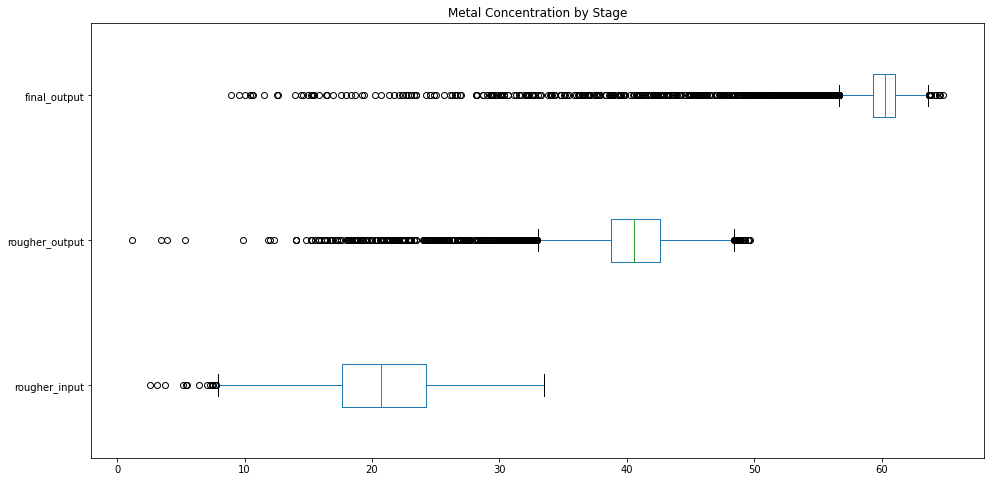

In [258]:
concentrate.plot(kind='box',
                 figsize=[16,8],
                 xlabel='Concentration (%)',
                 title='Metal Concentration by Stage',
                 vert=False
                )


plt.show()

Setelah melakukan step diatas,sudah menghapus seluruh 346 baris data yang mewakili konsentrasi kurang dari 0,5% untuk membantu akurasi model.

## Predictive Modeling

### Final sMAPE function

In [259]:
def final_smape (target, prediction):
    '''
    prediction is split into rougher prediction(RP) and final prediction(FP).
    target is split into rougher target(RT) and final target(FT).
    
    RT adalah nilai target pengamatan dalam sampel yang digunakan untuk mengukur kualitas keluaran yang lebih kasar.
    RP adalah nilai prediksi untuk observasi keluaran yang lebih kasar.
    FT adalah nilai target observasi dalam sampel yang digunakan untuk mengukur kualitas hasil akhir.
    FP adalah nilai prediksi observasi hasil akhir.
    '''
    
    RT, FT = target[:, 0], target[:, 1]
    RP, FP = prediction[:,0], prediction[:,1]
    
    ro_smape = (1/len(RT)) * sum(abs(RT - RP) / ((abs(RT) + abs(RP)) / 2) * 100)
    fo_smape = (1/len(FT)) * sum(abs(FT - FP) / ((abs(FT) + abs(FP)) / 2) * 100)
    final_smape = (.25 * ro_smape) + (.75 * fo_smape)
    
    return final_smape

In [260]:
# Mengubah fungsi menjadi pencetak skor validasi silang
smape_scorer = make_scorer(final_smape)

### Define features and Targets

In [261]:
#Training Set
features_train = data_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = data_train[['rougher.output.recovery', 'final.output.recovery']]

In [262]:
# Menyelesaikan set tes dari penuh lalu menentukan target
remove_columns = train_only_columns.drop(columns=['rougher.output.recovery', 'final.output.recovery'])
features_test = data_test['date'].to_frame()
features_test = features_test.merge(data_full, on='date', how='inner')
target_test = features_test[['rougher.output.recovery', 'final.output.recovery']]
features_test = features_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test = features_test.drop(columns=remove_columns)
features_train = features_train.drop(columns=remove_columns)

In [263]:
### Convert targets to numpy arrays
target_train = target_train.to_numpy()
target_test = target_test.to_numpy()

Saya sudah membuat fitur dan kumpulan target untuk data pelatihan, serta menggunakan kumpulan data lengkap untuk merekonstruksi kumpulan pengujian guna menyediakan kolom target yang hilang untuk perhitungan sMAPE. Kemudian membuat fitur pengujian dan kumpulan target untuk kumpulan pengujian tersebut, lalu menghapus kolom dari fitur pelatihan yang tidak ada dalam data pengujian. Kumpulan data pengujian juga telah dikonversi menjadi array numpy supaya sesuai dengan hasil model yang dihasilkan.

### Train models

####  Dummy Regressor as baseline

In [264]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
DummyRegressor()
scores = cross_val_score(dummy_regr, features_train, target_train, cv=5, scoring=smape_scorer)
dummy_score = sum(scores) / len(scores)
print("Baseline sMAPE value:", dummy_score)

Baseline sMAPE value: 8.999310441612915


Dari model Dummy Regressor terlihat nilai baseline sMAPE adalah `8.999310441612915`, atau error dibulatkan menjadi `8.999%`. Hal ini menunjukkan bahwa akurasi rata-rata akan menghasilkan rata-rata kesalahan sekitar 9%. Kami akan menggunakan garis dasar ini untuk membandingkan model berikut guna melihat seberapa baik model tersebut dapat memprediksi nilai target

####  Decision Tree Regression

In [265]:
dtr_model = None
best_score = 100
best_depth = 0
for depth in range(1, 15):
    model = DecisionTreeRegressor(max_depth=depth, random_state=759638)
    model.fit(features_train, target_train)
    scores = cross_val_score(model, features_train, target_train, cv=5, scoring=smape_scorer)
    cv_score = sum(scores) / len(scores)
    if abs(cv_score) < abs(best_score):
        dtr_model = model
        best_score = cv_score
        best_depth = depth

In [266]:
dtr_model = DecisionTreeRegressor(max_depth=best_depth, random_state=759638)
dtr_model.fit(features_train, target_train)

print("Best Depth:", best_depth)
print("Highest Average Cross Validation Score:", best_score)

Best Depth: 1
Highest Average Cross Validation Score: 7.773208320568386


#### Random Forest Regressor

In [267]:
# Best Estimators = 30
# Best Depth = 7
# Best Average Cross Validation sMAPE = 7.930349269172259

rfr_model = None
best_score = 100
best_est = 0
best_depth = 0
for est in range(20, 40, 10):
    for depth in range (4, 10):
        model = RandomForestRegressor(random_state=759638, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        scores = cross_val_score(model, features_train, target_train, cv=5, scoring=smape_scorer)
        cv_score = sum(scores) / len(scores)
        if abs(cv_score) < abs(best_score):
            rfr_model = model
            best_score = cv_score
            best_est = est
            best_depth = depth

In [268]:
rfr_model = RandomForestRegressor(random_state=759638, n_estimators=best_est, max_depth=best_depth)
rfr_model.fit(features_train, target_train)

print("Best Estimators:", best_est)
print("Best Depth:", best_depth)
print("Highest Average Cross Validation Score:", best_score)

Best Estimators: 30
Best Depth: 7
Highest Average Cross Validation Score: 7.930349269172259


#### Linear Regression

In [269]:
lr_model = LinearRegression()
lr_model.fit(features_train, target_train)

scores = cross_val_score(lr_model, features_train, target_train, cv=5, scoring=smape_scorer)
final_score = sum(scores) / len(scores)

print('Average Cross Validation Score:', final_score)

Average Cross Validation Score: 8.34316591243814


Model terbaik dengan sMAPE Cross Validation bulat sebesar `7.773208320568386` adalah Decision Tree Regressor, dengan kedalaman 1. Kita akan menggunakan model ini untuk menghitung sMAPE akhir dan memverifikasi kualitasnya menggunakan kumpulan data pengujian. Nilai ini `1% lebih baik` dibandingkan nilai dasar yang ditetapkan oleh nilai sMAPE Dummy Regressor sebesar `8,999%.`

### sMAPE of test set

In [270]:
test_pred = dtr_model.predict(features_test)

In [271]:
final_smape = final_smape(test_pred, target_test)

In [272]:
display(final_smape)

6.954807520960105

Mean Absolute Percentage Error atau sMAPE simetris akhir adalah `6.954807520960105%` ketika prediksi dilakukan dengan model Decision Tree Regressor. Hal ini menunjukkan bahwa model yang digunakan rata-rata memiliki lebih dari `93% prediksi akurat.`

## Conclusion

Kami merekomendasikan penggunaan model `Random Forest Regression` yang dikembangkan di sini karena model ini menghasilkan rata-rata sMAPE terbaik dari semua model yang kami kembangkan, model ini juga disajikan `lebih dari 93% akurat` dengan kumpulan data pengujian saat sMAPE dievaluasi. Tidak hanya memilih model Random Forest Regression dengan memilih nilai sMAPE terbaik dari model yang dihasilkan dengan hyperparameter yang disesuaikan, namun dibandingkan dengan baseline Dummy Regressor sebesar 8,999%, kami dapat melihat bahwa model akhir menunjukkan peningkatan akurasi dalam prediksinya.

Model ini akan memberikan penilaian produksi emas yang relatif akurat bagi Zyfra yang menjadi sumber datanya.